In [1]:
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import
import numpy as np
np.set_printoptions(edgeitems=20, precision=3, linewidth=160)
#np.core.arrayprint._line_width = 180
import matplotlib.pyplot as plt
fig_width = 12
%matplotlib inline


# the switching binomial generative model


## likelihood function

In [2]:
import bayesianchangepoint as bcp
help(bcp.likelihood)

Help on function likelihood in module bayesianchangepoint.bcp:

likelihood(o, p, r)
    Knowing $p$ and $r$, the sufficient statistics of the beta distribution $B(lpha,eta)$ :
    $$
        alpha = p*r
        beta  = (1-p)*r
    $$
    the likelihood of observing o is that of a binomial of
    
        - mean rate of chosing hypothesis "o=1" = (p*r + o)/(r+1)
        - number of choices where  "o=1" equals to p*r+1
    
    since both likelihood sum to 1, the likelihood of drawing o in the set {0, 1}
    is equal to



In [3]:
for p_ in [0, .25, .5, .75, 1]:
    for r in (2**np.arange(5)-1):
        print('Knowing p=', p_, 'and r=', r, ', the likelihood for 0=', bcp.likelihood(0, p_, r), ', for 1=', bcp.likelihood(1, p_, r), ', sum=', bcp.likelihood(0, p_, r)+bcp.likelihood(1, p_, r))

Knowing p= 0 and r= 0 , the likelihood for 0= 0.5 , for 1= 0.5 , sum= 1.0
Knowing p= 0 and r= 1 , the likelihood for 0= 0.8 , for 1= 0.2 , sum= 1.0
Knowing p= 0 and r= 3 , the likelihood for 0= 0.9045936395759717 , for 1= 0.09540636042402827 , sum= 1.0
Knowing p= 0 and r= 7 , the likelihood for 0= 0.9532098019182014 , for 1= 0.04679019808179863 , sum= 1.0
Knowing p= 0 and r= 15 , the likelihood for 0= 0.976812163875552 , for 1= 0.023187836124448087 , sum= 1.0000000000000002
Knowing p= 0.25 and r= 0 , the likelihood for 0= 0.5 , for 1= 0.5 , sum= 1.0
Knowing p= 0.25 and r= 1 , the likelihood for 0= 0.6386676768158934 , for 1= 0.3613323231841066 , sum= 1.0
Knowing p= 0.25 and r= 3 , the likelihood for 0= 0.6923111756016641 , for 1= 0.30768882439833595 , sum= 1.0
Knowing p= 0.25 and r= 7 , the likelihood for 0= 0.7201814563014943 , for 1= 0.2798185436985056 , sum= 1.0
Knowing p= 0.25 and r= 15 , the likelihood for 0= 0.7347677771670017 , for 1= 0.26523222283299835 , sum= 1.0
Knowing p= 0.

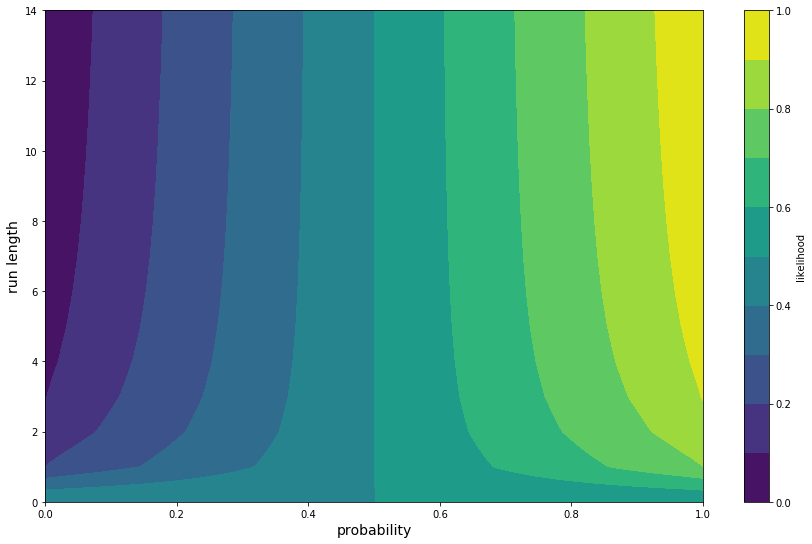

In [4]:
fig_width= fig_width
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.6180), sharex=True)

p, r = np.meshgrid(np.linspace(0., 1., 200, endpoint=True), np.arange(15))

L = bcp.likelihood(o=1, p=p, r=r)

#CS = ax.pcolormesh(p, r, L)

CS = ax.contourf(p, r, L, levels=np.linspace(0., 1., 11, endpoint=True))

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel('likelihood')

fig.tight_layout()
ax.set_ylabel('run length', fontsize=14)
#axs[i_layer].axis('tight')
ax.set_xlabel('probability', fontsize=14);

In [5]:
p, r = np.meshgrid(np.linspace(0., 1., 17, endpoint=True), np.arange(15))
L = bcp.likelihood(o=1, p=p, r=r)
print(L)

[[0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5  ]
 [0.2   0.249 0.288 0.325 0.361 0.396 0.431 0.466 0.5   0.534 0.569 0.604 0.639 0.675 0.712 0.751 0.8  ]
 [0.129 0.188 0.236 0.281 0.326 0.37  0.413 0.457 0.5   0.543 0.587 0.63  0.674 0.719 0.764 0.812 0.871]
 [0.095 0.158 0.209 0.259 0.308 0.356 0.404 0.452 0.5   0.548 0.596 0.644 0.692 0.741 0.791 0.842 0.905]
 [0.076 0.14  0.193 0.245 0.297 0.348 0.399 0.449 0.5   0.551 0.601 0.652 0.703 0.755 0.807 0.86  0.924]
 [0.063 0.127 0.182 0.236 0.289 0.342 0.395 0.447 0.5   0.553 0.605 0.658 0.711 0.764 0.818 0.873 0.937]
 [0.054 0.119 0.175 0.23  0.284 0.338 0.392 0.446 0.5   0.554 0.608 0.662 0.716 0.77  0.825 0.881 0.946]
 [0.047 0.112 0.169 0.224 0.28  0.335 0.39  0.445 0.5   0.555 0.61  0.665 0.72  0.776 0.831 0.888 0.953]
 [0.042 0.107 0.164 0.221 0.277 0.333 0.388 0.444 0.5   0.556 0.612 0.667 0.723 0.779 0.836 0.893 0.958]
 [0.037 0.103 0.16  0.217 0.274 0.331 0.387 0.444 0.5  

## performing inference: application to synthetic data

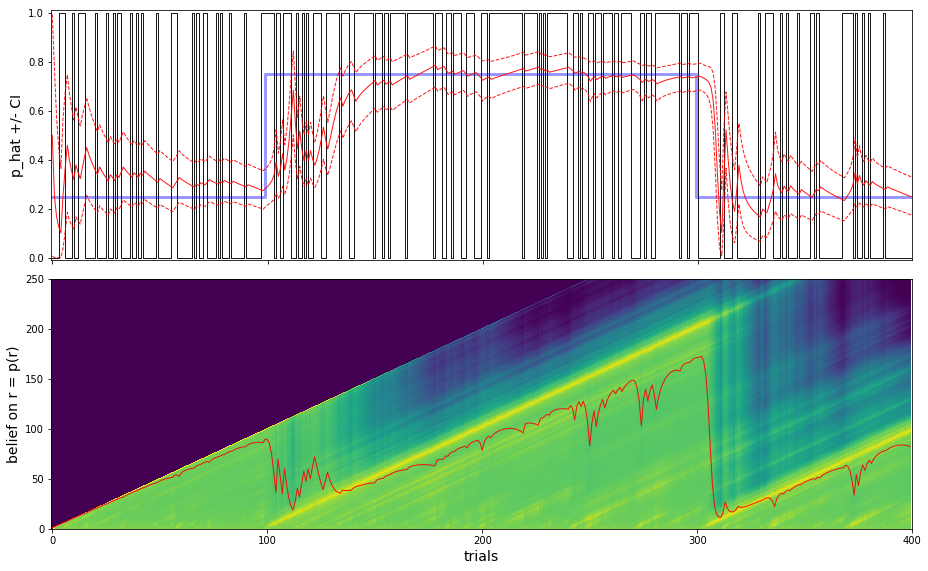

In [6]:
T = 400
mode = 'expectation'
p_gen = .25 * np.ones(T)
p_gen[100:300] = .75
np.random.seed(42)
o = 1 * (p_gen > np.random.rand(T))

p_bar, r, beliefs = bcp.inference(o, h=1/200, p0=.5)
fig, axs = bcp.plot_inference(o, p_gen, p_bar, r, beliefs, max_run_length=250, mode=mode)

## different read-outs

The full Bayesian models provides with a probabilistic representation of the pdf of $p$ for all possible run-length values. 
Instead of using the expectation (as above), one could use another readout mode, such as to take the run-length with maximal probability:

In [7]:
p_bar, r, beliefs = bcp.inference(o, h=1/200, p0=.5)

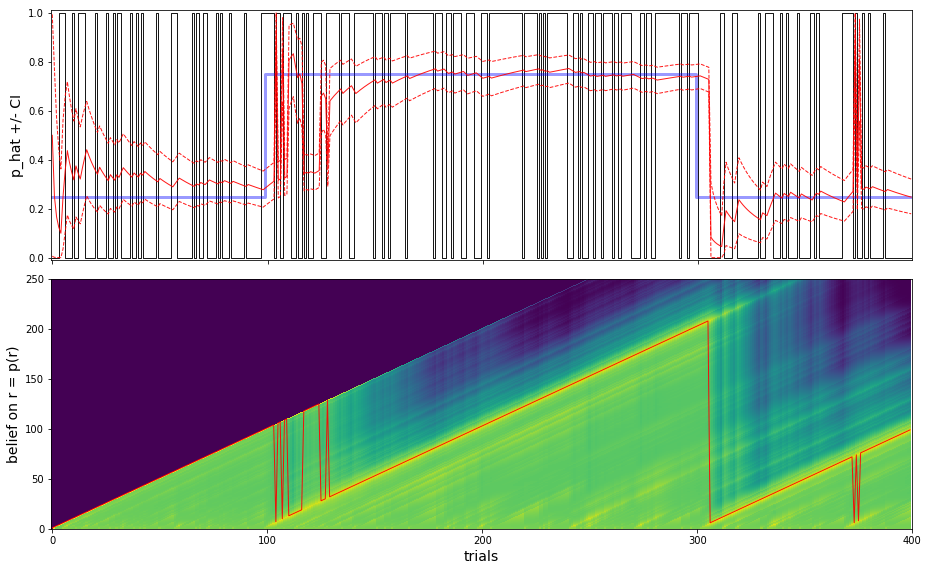

In [8]:
fig, axs = bcp.plot_inference(o, p_gen, p_bar, r, beliefs, max_run_length=250, mode='max')

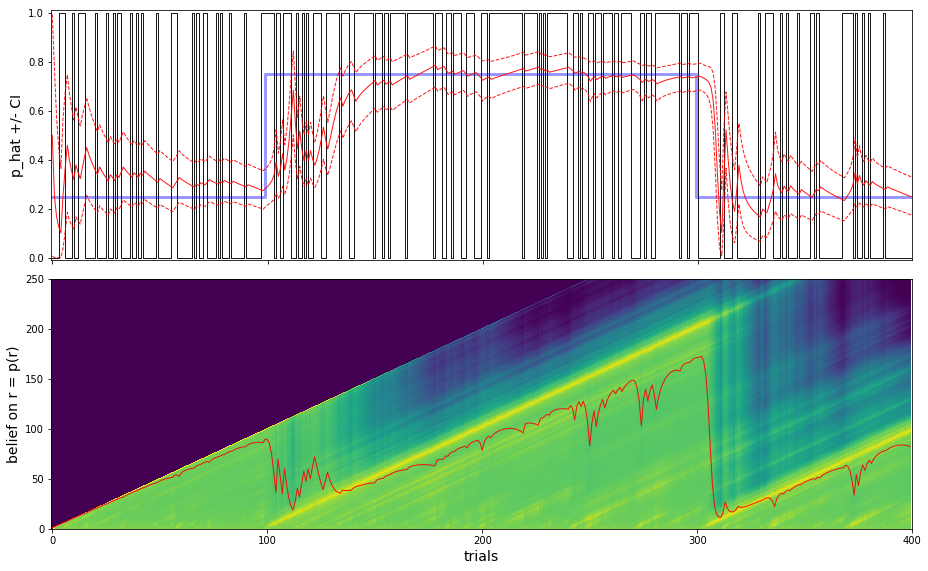

In [9]:
fig, axs = bcp.plot_inference(o, p_gen, p_bar, r, beliefs, max_run_length=250, mode='expectation')

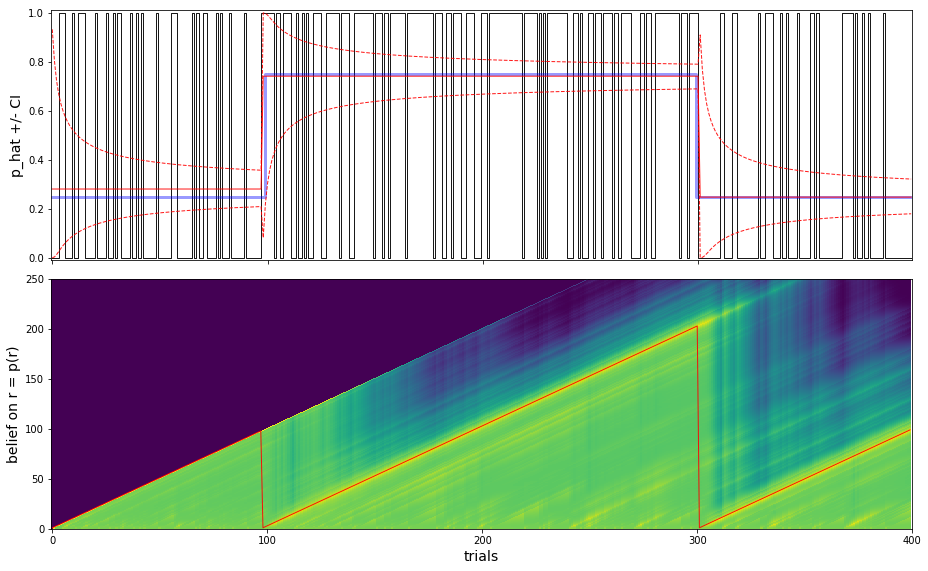

In [10]:
fig, axs = bcp.plot_inference(o, p_gen, p_bar, r, beliefs, max_run_length=250, mode='hindsight')

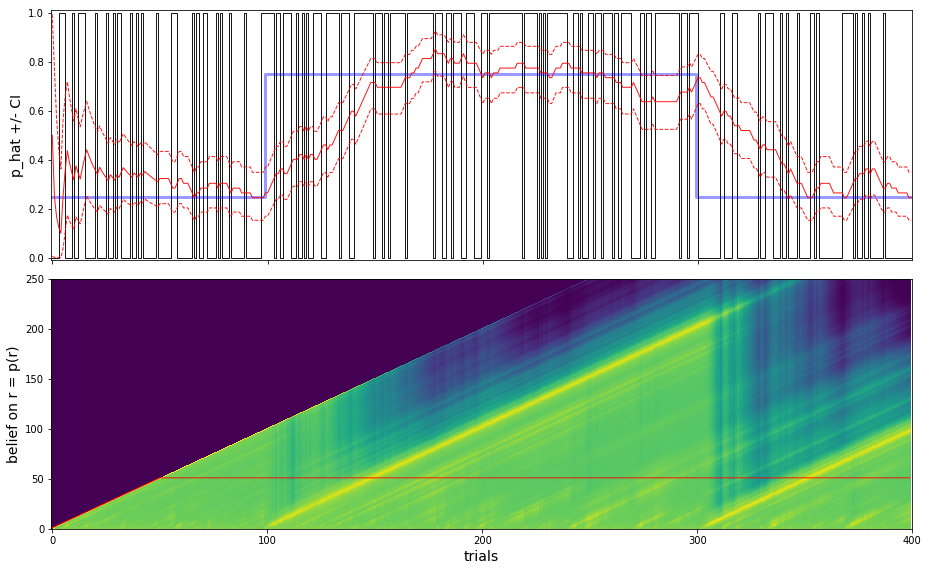

In [11]:
fig, axs = bcp.plot_inference(o, p_gen, p_bar, r, beliefs, max_run_length=250, mode='fixed', fixed_window_size=50)

## testing different hazard rates

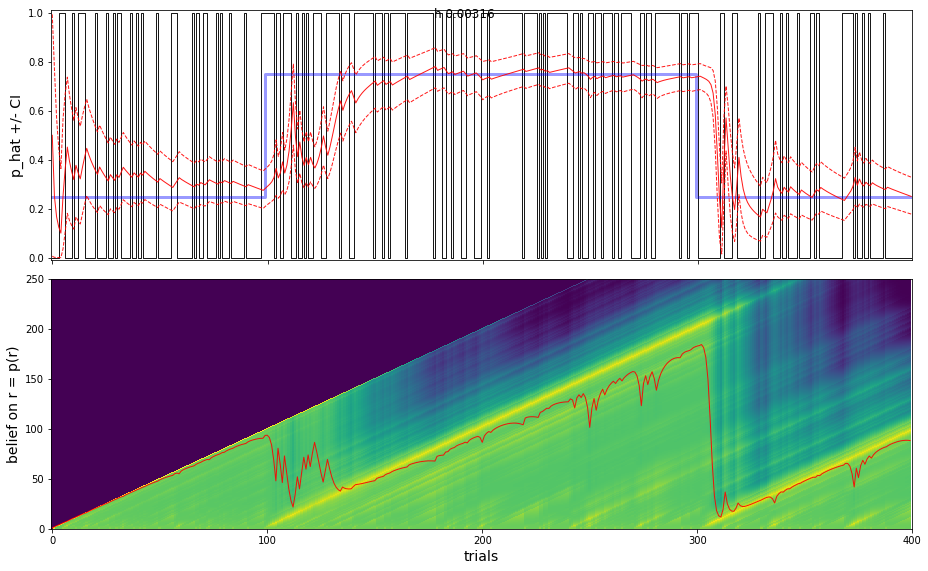

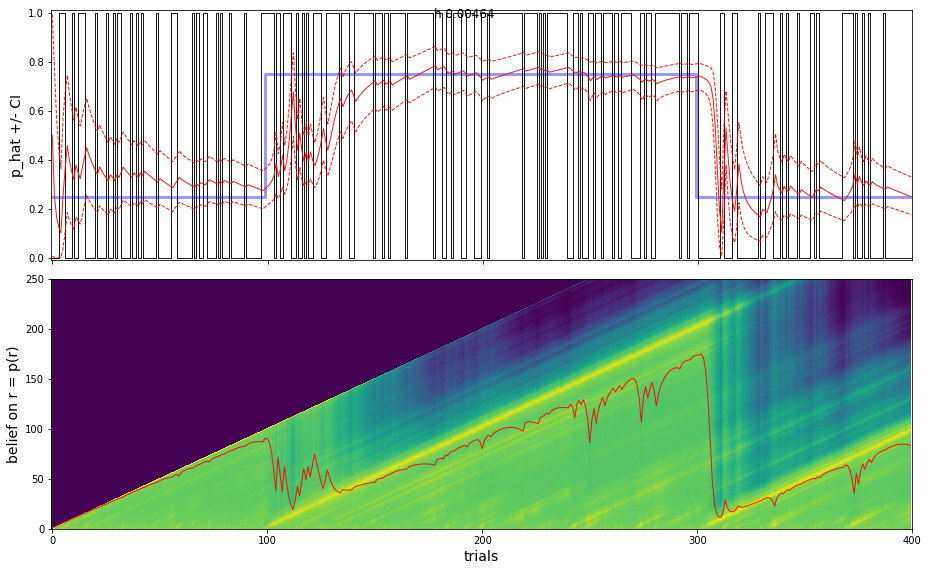

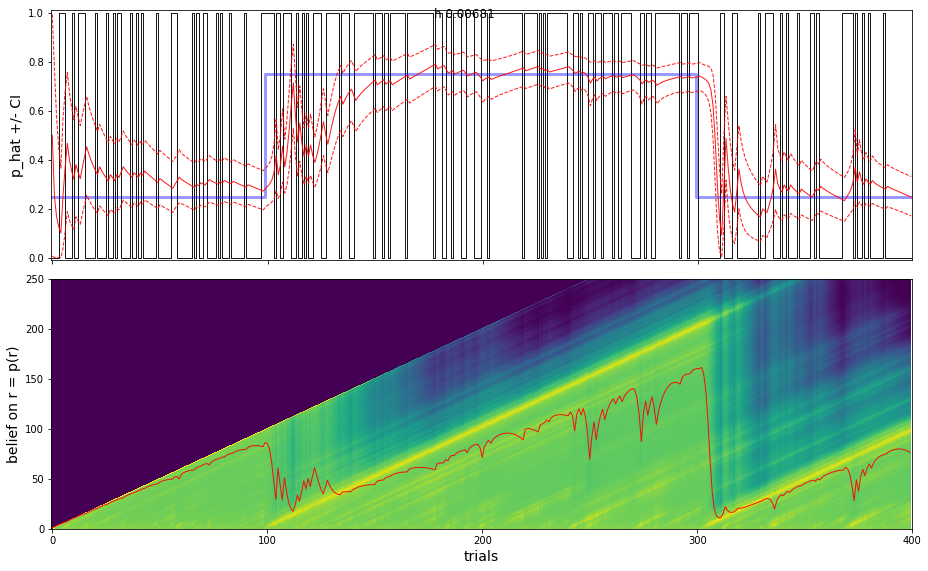

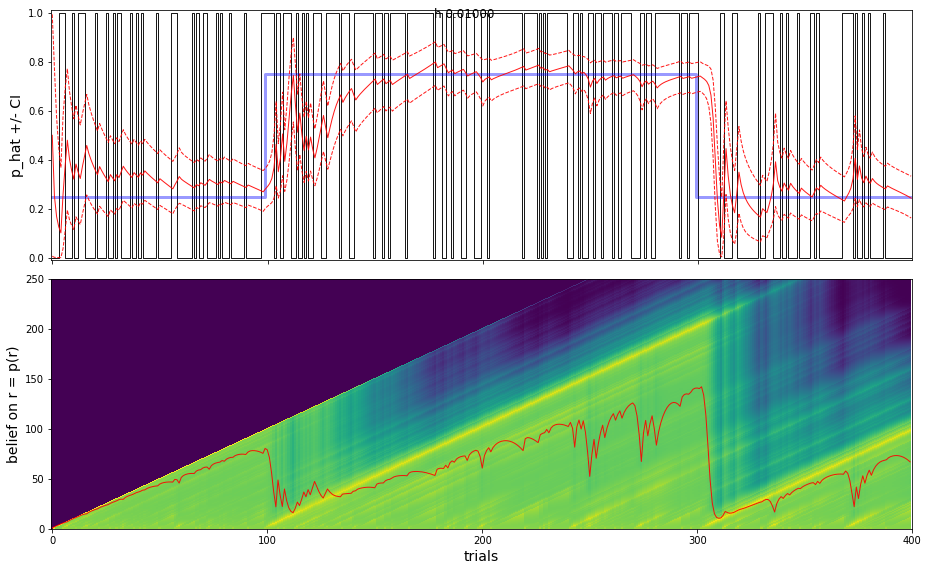

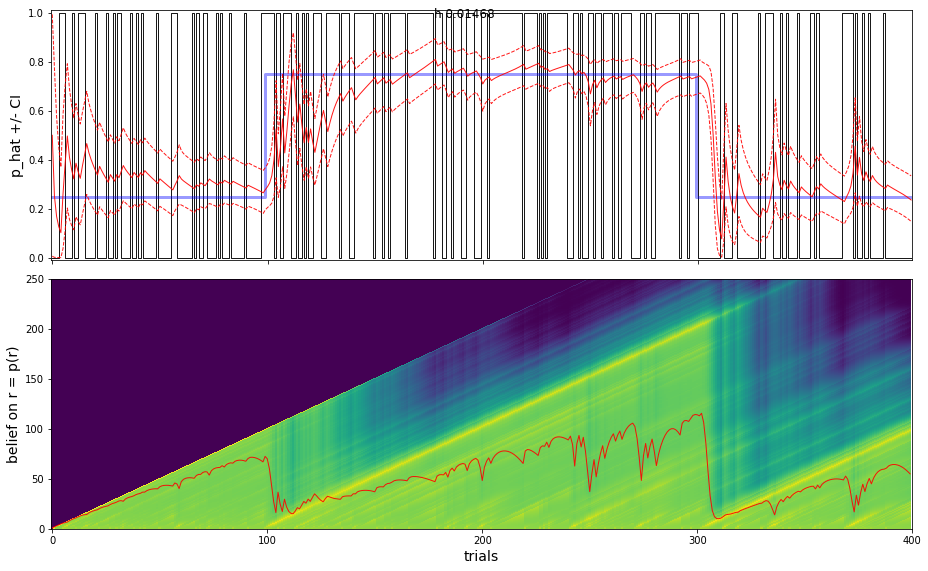

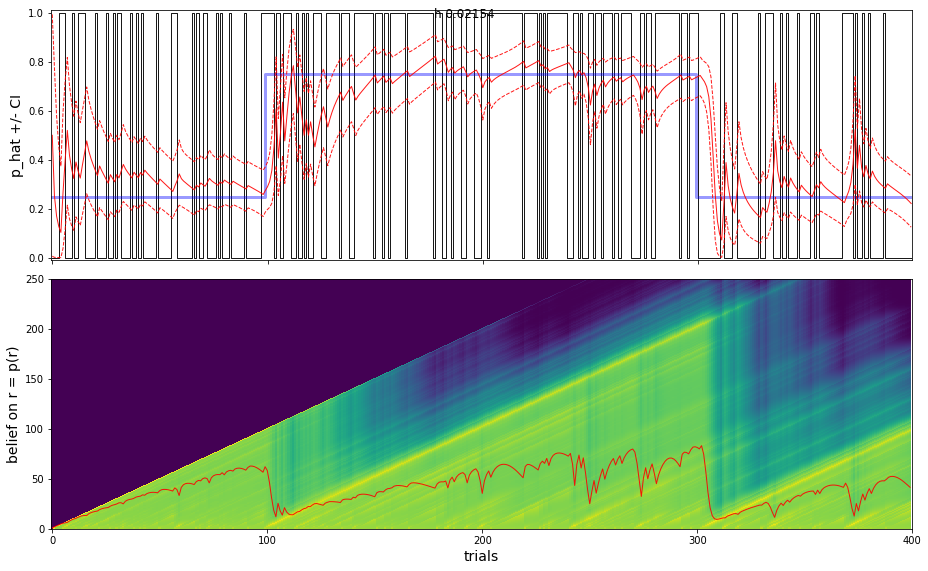

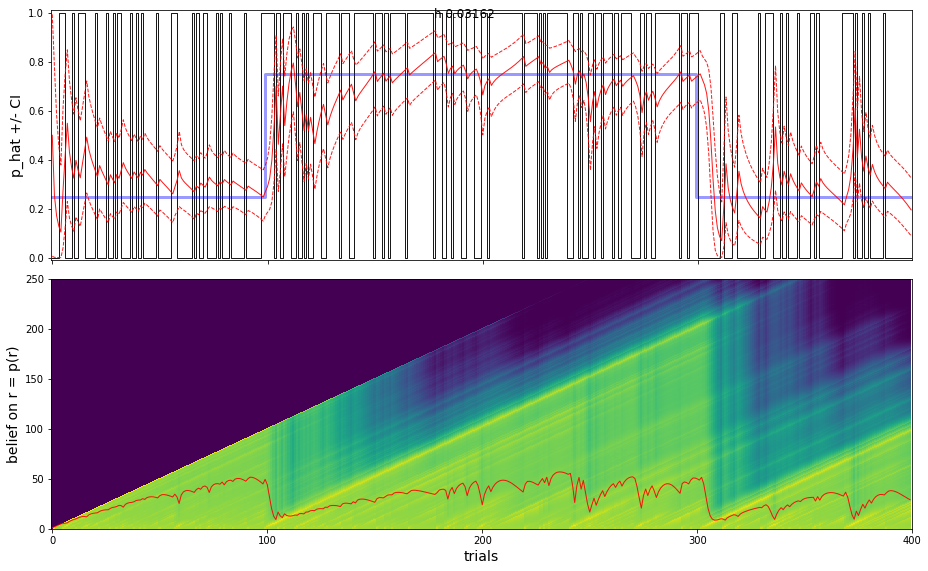

In [12]:
hs = 1./100*np.logspace(-.5, .5, 7, endpoint=True)
for h_ in hs:
    p_bar, r, beliefs = bcp.inference(o, h=h_, p0=.5)
    fig, axs = bcp.plot_inference(o, p_gen, p_bar, r, beliefs, max_run_length=250, mode=mode)
    fig.suptitle('h %.5f' % h_)
    plt.show()

In [13]:
p_bar

array([[0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , ...,
        0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  , 0.5  ],
       [0.   , 0.25 , 0.25 , 0.25 , 0.25 , 0.75 , 0.75 , 0.75 , 0.25 , 0.25 , 0.25 , 0.75 , 0.25 , 0.25 , 0.75 , 0.75 , 0.75 , 0.25 , 0.25 , 0.25 , ...,
        0.25 , 0.75 , 0.25 , 0.25 , 0.25 , 0.25 , 0.25 , 0.25 , 0.75 , 0.25 , 0.25 , 0.25 , 0.25 , 0.25 , 0.25 , 0.25 , 0.25 , 0.25 , 0.25 , 0.25 ],
       [0.   , 0.   , 0.167, 0.167, 0.167, 0.5  , 0.833, 0.833, 0.5  , 0.167, 0.167, 0.5  , 0.5  , 0.167, 0.5  , 0.833, 0.833, 0.5  , 0.167, 0.167, ...,
        0.167, 0.5  , 0.5  , 0.167, 0.167, 0.167, 0.167, 0.167, 0.5  , 0.5  , 0.167, 0.167, 0.167, 0.167, 0.167, 0.167, 0.167, 0.167, 0.167, 0.167],
       [0.   , 0.   , 0.   , 0.125, 0.125, 0.375, 0.625, 0.875, 0.625, 0.375, 0.125, 0.375, 0.

In [14]:
beliefs[:, 0], beliefs[0, :] 

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

In [15]:
p_hat = np.sum(p_bar[:, 1:] * r[:, :-1] * beliefs[:, :-1], axis=0)
p_hat            

array([ 0.5  ,  0.5  ,  0.5  ,  0.5  ,  1.468,  2.35 ,  3.145,  2.919,  3.03 ,  3.003,  3.9  ,  3.804,  3.805,  4.702,  5.515,  6.113,  5.582,  5.958,  5.928,
        5.756,  5.5  ,  6.152,  6.407,  6.358,  6.152,  5.882,  6.541,  6.753,  6.729,  7.495,  7.417,  8.43 ,  9.019,  8.109,  8.753,  8.816,  8.665,  9.36 ,
        9.298,  9.369, 10.149,  9.876, 10.961, 10.374, 10.64 , 10.545, 10.29 ,  9.929,  9.483,  9.935, 10.397, 10.416, 10.124,  9.719,  9.245,  8.723,  9.134,
       10.832, 10.801,  8.595, 10.781, 11.355, 11.373, 11.131, 10.735, 10.232, 10.619, 11.295, 12.361, 11.827, 12.266, 13.156, 13.492, 11.648, 13.015, 13.361,
       13.323, 14.034, 13.613, 14.922, 13.794, 14.431, 14.492, 15.267, 14.61 , 15.002, 14.912, 14.613, 14.171, 13.614, 13.929, 14.428, 14.59 , 14.27 , 13.778,
       13.181, 12.508, 11.777, 11.973, 14.123, 13.521, 11.046,  8.38 ,  6.923,  5.697,  8.144,  7.866,  7.082,  8.466,  8.811,  9.314,  9.968,  9.729,  9.086,
        8.8  ,  9.588,  8.575,  8.262,  9.218,

In [16]:
np.sum(r[:, :-1] * beliefs[:, :-1], axis=0)

array([ 1.   ,  1.968,  2.914,  3.844,  4.763,  5.327,  5.688,  5.967,  7.471,  8.471,  9.291,  9.956, 10.953, 11.729, 12.262, 12.298, 11.991, 13.965, 14.919,
       15.497, 15.845, 16.019, 17.465, 18.327, 18.749, 18.983, 19.09 , 20.408, 21.35 , 21.747, 22.317, 23.453, 23.242, 21.606, 24.475, 25.668, 26.223, 26.403,
       27.111, 28.299, 28.712, 28.842, 30.159, 29.431, 31.179, 31.867, 32.074, 31.949, 31.555, 30.932, 33.094, 34.158, 34.224, 33.915, 33.371, 32.653, 31.806,
       34.66 , 31.938, 25.371, 33.926, 36.972, 38.11 , 38.345, 38.043, 37.368, 36.413, 39.24 , 40.632, 39.573, 42.108, 42.862, 41.563, 36.363, 41.954, 44.152,
       45.047, 45.191, 44.656, 46.788, 44.016, 47.115, 48.318, 48.661, 47.423, 49.7  , 50.383, 50.356, 49.836, 48.916, 47.655, 50.072, 51.646, 51.535, 50.808,
       49.699, 48.307, 46.696, 44.92 , 49.471, 44.265, 32.502, 20.276, 12.577,  9.287, 16.787, 12.964, 11.177, 15.025, 13.379, 12.732, 12.791, 13.215, 13.756,
       13.605, 15.17 , 15.278, 14.933, 16.732,